# Словари

In [ ]:
eng_rus = {'cat': 'кошка', 'dog': 'собака'}  # создали словарь
eng_rus['cat']  # обратились по ключу к словарю и узнали значение

'кошка'

In [ ]:
eng_rus['кошка']

KeyError: 'кошка'

In [ ]:
eng_rus['cat']

'кошка'

In [ ]:
eng_rus['racoon'] = 'енот'  # добавили пару - ключ: значение
eng_rus

{'cat': 'кошка', 'dog': 'собака', 'racoon': 'енот'}

Добавьте любимое животное в словарь

In [ ]:
eng_rus.items()

dict_items([('cat', 'кошка'), ('dog', 'собака'), ('racoon', 'енот')])

In [ ]:
for pair in eng_rus.items():
  if pair[1]=='енот':
      print(pair[0])

racoon


In [ ]:
for eng_word, rus_word in eng_rus.items():  # items - чтобы получить пары
                                            # keys - для ключей, values - для значений
    print(rus_word, '-', eng_word)

кошка - cat
собака - dog
енот - racoon


### Тренировка
Создайте словарь книг, где ключом будет автор, а значением список, написанных им книг.

In [ ]:
auth_books = {'Л. Н. Толстой': ['Война и мир', 'Анна Каренина'],
              'А. С. Пушкин': ['Евгений Онегин'],
              'Маяковский': ['Послушайте', 'Скрипка немного нервно']}
auth_books

{'Л. Н. Толстой': ['Война и мир', 'Анна Каренина'],
 'А. С. Пушкин': ['Евгений Онегин'],
 'Маяковский': ['Послушайте', 'Скрипка немного нервно']}

In [ ]:
auth_books['Л. Н. Толстой'][0]

'Война и мир'

# Чтение файла и поиск частотных слов


In [ ]:
# укажите путь до вашего файла
with open('vojna-i-mir.txt', 'r', encoding='UTF-8') as f:
    text = f.read()

In [ ]:
print(text[:50])

Часть первая

I

   В начале июля, в чрезвычайно ж


In [ ]:
from string import punctuation

In [ ]:
punctuation + '—'

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~——'

In [ ]:
words = []
for word in text.split():
    good_word = word.strip(punctuation + '—').lower()
    if good_word != '':
        words.append(good_word)
words[:10]

['часть',
 'первая',
 'i',
 'в',
 'начале',
 'июля',
 'в',
 'чрезвычайно',
 'жаркое',
 'время']

In [ ]:
len(words)

170083

In [ ]:
word2number = {}  # это словарь {слово: количество вхождений}
for word in words:
    if word not in word2number:
        word2number[word] = 1
    else:
        word2number[word] += 1

In [ ]:
len(word2number)

25792

Вывели частотные слова:

In [ ]:
sorted(word2number.items(), key=lambda x:x[1], reverse=True)[:10]

[('и', 8452),
 ('не', 3779),
 ('в', 3726),
 ('что', 3215),
 ('он', 2852),
 ('на', 2407),
 ('я', 2398),
 ('с', 2006),
 ('а', 1775),
 ('как', 1622)]

In [ ]:
from collections import Counter

In [ ]:
words[:10]

['часть',
 'первая',
 'i',
 'в',
 'начале',
 'июля',
 'в',
 'чрезвычайно',
 'жаркое',
 'время']

In [ ]:
Counter(words).most_common(10)

[('и', 8452),
 ('не', 3779),
 ('в', 3726),
 ('что', 3215),
 ('он', 2852),
 ('на', 2407),
 ('я', 2398),
 ('с', 2006),
 ('а', 1775),
 ('как', 1622)]

In [ ]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

In [ ]:
FreqDist(words)

FreqDist({'и': 8452, 'не': 3779, 'в': 3726, 'что': 3215, 'он': 2852, 'на': 2407, 'я': 2398, 'с': 2006, 'а': 1775, 'как': 1622, ...})

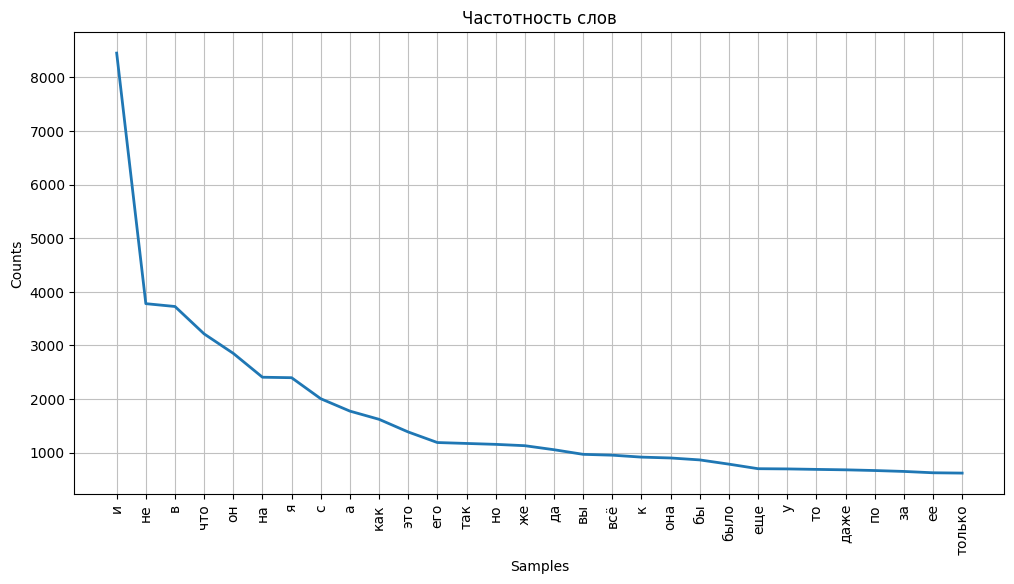

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Частотность слов') # название
fdist = FreqDist(words)
fdist.plot(30, cumulative=False)

plt.show()

**Закон Ципфа:** если все слова языка (или просто достаточно длинного текста) упорядочить по убыванию частотности их использования, то частотность n-го слова в таком списке окажется приблизительно обратно пропорциональной его порядковому номеру n (так называемому рангу этого слова, см. шкала порядка). Например, второе по используемости слово встречается примерно в два раза реже, чем первое, третье — в три раза реже, чем первое, и так далее.

(Работает не только в лингвистике, закон скорее про статистику и устройство мира)

## Лемматизация

In [ ]:
! pip3 install pymystem3

In [ ]:
from pymystem3 import Mystem
m = Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [ ]:
lemmas = m.lemmatize(text)

In [ ]:
lemmas[:15]

['\n',
 '\n',
 'том',
 ' ',
 'первый',
 '\n',
 '\n',
 '\n',
 'часть',
 ' ',
 'первый',
 '\n',
 '\n',
 '\n',
 '\n']

# Стопслова

In [ ]:
! pip3 install nltk

In [ ]:
import nltk

In [ ]:
! python3 -m nltk.downloader stopwords

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stopwords = nltk.corpus.stopwords.words('russian')
stopwords[:5]

['и', 'в', 'во', 'не', 'что']

In [ ]:
stopwords.extend(['это', "свой", "весь", "мочь"])

In [ ]:
lemmas_notstop = [word for word in lemmas if word not in stopwords and word.isalpha()]

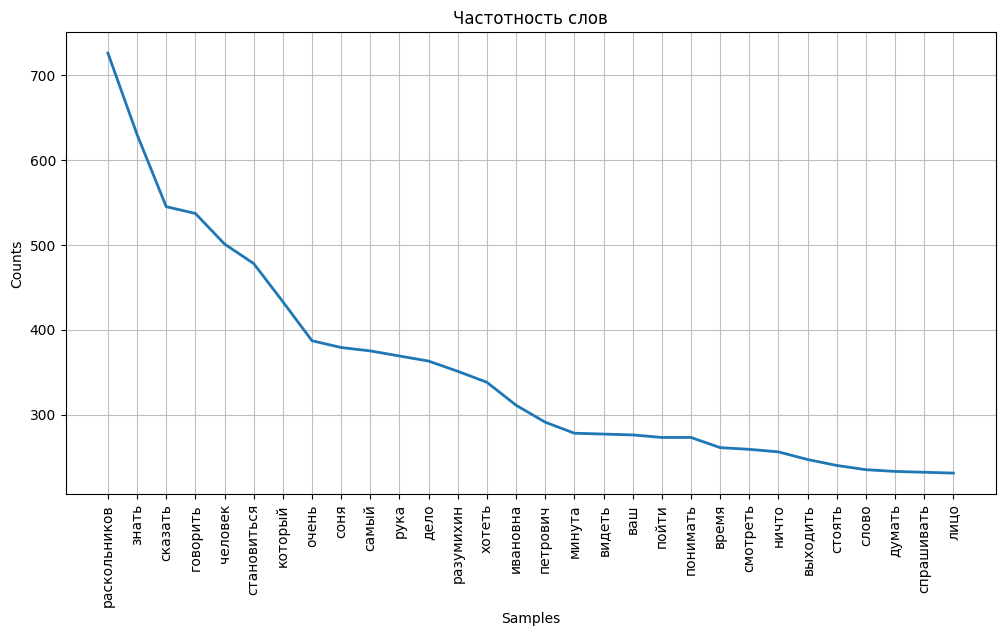

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Частотность слов') # название
fdist = FreqDist(lemmas_notstop)
fdist.plot(30, cumulative=False)

plt.show()

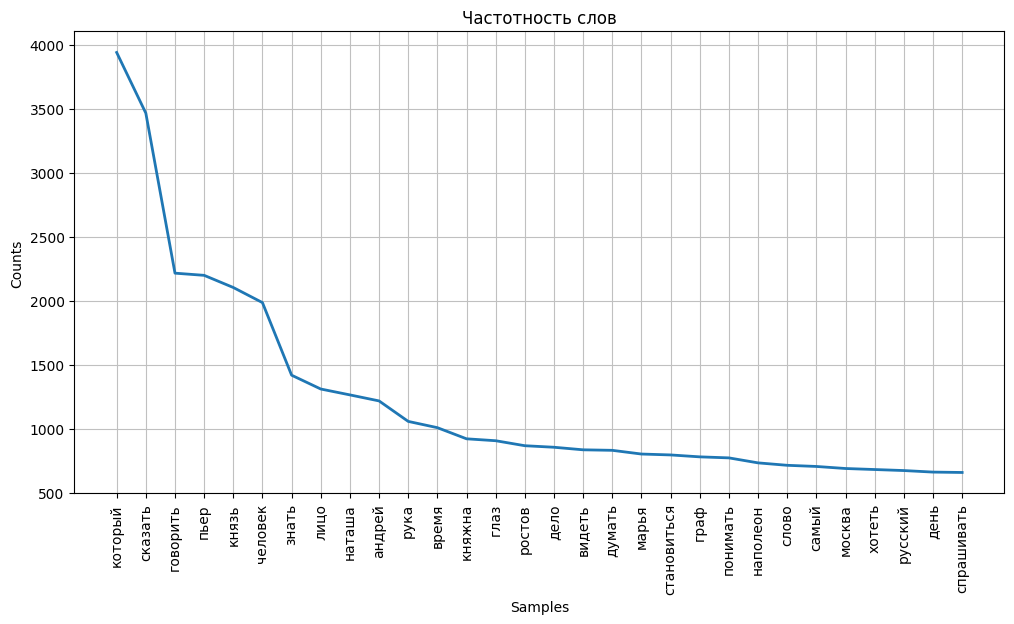

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Частотность слов') # название
fdist = FreqDist(lemmas_notstop)
fdist.plot(30, cumulative=False)

plt.show()